In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
df = pd.read_csv("/content/pizza_sales.csv")

df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
population_size = df.shape[0]
# Simple Random Sampling (10%)
sample_df = df.sample(frac=0.1, random_state=42)
sample_size = sample_df.shape[0]

print("Population Size:", population_size)
print("Sample Size:", sample_size)

Population Size: 48620
Sample Size: 4862


In [4]:
# Random Sample
random_sample = df.sample(n=100, random_state=1)

# Systematic Sample (every 10th record)
systematic_sample = df.iloc[::10]

# Numerical column selected
column = "total_price"

# Mean calculations
population_mean = df[column].mean()
random_mean = random_sample[column].mean()
systematic_mean = systematic_sample[column].mean()

print("Population Mean:", population_mean)
print("Random Sample Mean:", random_mean)
print("Systematic Sample Mean:", systematic_mean)


Population Mean: 16.821473673385437
Random Sample Mean: 16.38
Systematic Sample Mean: 16.77310777457836


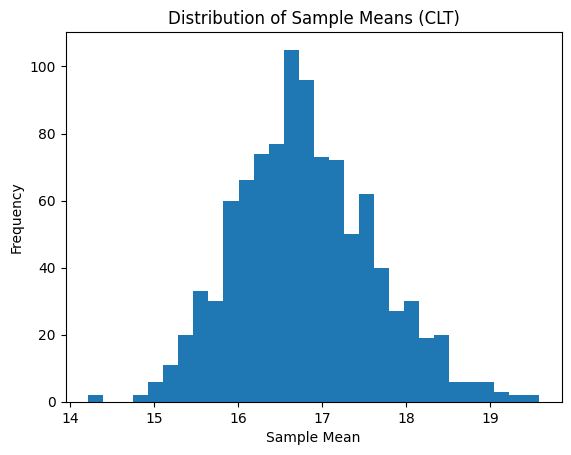

In [5]:
import matplotlib.pyplot as plt

sample_means = []

for i in range(1000):
    sample = df["total_price"].sample(n=30)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means (CLT)")
plt.show()


In [6]:
mean = df["total_price"].mean()
std = df["total_price"].std()

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 16.821473673385437
Standard Deviation: 4.4373975811805755


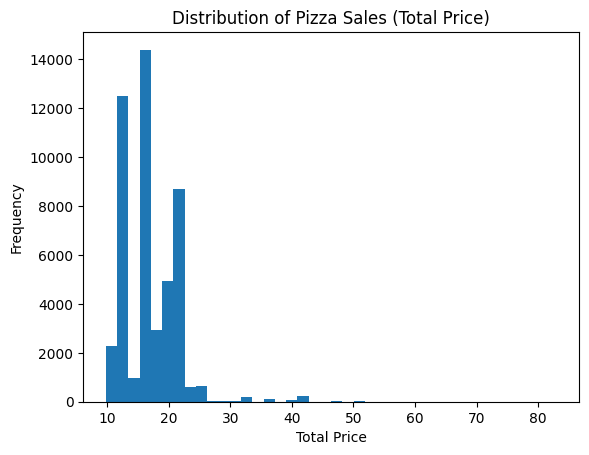

In [7]:
import matplotlib.pyplot as plt

plt.hist(df["total_price"], bins=40)
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.title("Distribution of Pizza Sales (Total Price)")
plt.show()

In [8]:
population_size = df.shape[0]

within_1_std = df[
    (df["total_price"] >= mean - std) &
    (df["total_price"] <= mean + std)
].shape[0] / population_size * 100

within_2_std = df[
    (df["total_price"] >= mean - 2*std) &
    (df["total_price"] <= mean + 2*std)
].shape[0] / population_size * 100

within_3_std = df[
    (df["total_price"] >= mean - 3*std) &
    (df["total_price"] <= mean + 3*std)
].shape[0] / population_size * 100

print("Within 1 Std Dev:", within_1_std)
print("Within 2 Std Dev:", within_2_std)
print("Within 3 Std Dev:", within_3_std)

Within 1 Std Dev: 78.45331139448787
Within 2 Std Dev: 98.56437679967091
Within 3 Std Dev: 98.61579596873715


In [9]:
from scipy.stats import zscore

# Calculate Z-score for total_price
df["Z_Score"] = zscore(df["total_price"])

# View first few rows
df[["total_price", "Z_Score"]].head()


,total_price,Z_Score
0,13.25,-0.804866
1,16.00,-0.185127
2,18.50,0.378272
3,20.75,0.885331
4,16.00,-0.185127


In [10]:
# Identify outliers
outliers = df[(df["Z_Score"] > 3) | (df["Z_Score"] < -3)]

print("Number of Outliers:", outliers.shape[0])

outliers[["total_price", "Z_Score"]].head()


Number of Outliers: 673


,total_price,Z_Score
48,32.00,3.420627
183,62.25,10.237756
211,41.50,5.561544
222,32.00,3.420627
341,50.25,7.533440
